In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from keras.layers.normalization.batch_normalization import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/classification-of-mnist-digits/train_result.csv
/kaggle/input/classification-of-mnist-digits/train.csv
/kaggle/input/classification-of-mnist-digits/test.csv


In [36]:
train = pd.read_csv('../input/classification-of-mnist-digits/train.csv')
test = pd.read_csv('../input/classification-of-mnist-digits/test.csv')
train_result=pd.read_csv('../input/classification-of-mnist-digits/train_result.csv')

In [38]:
# Train Data
train

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 1560,Feature 1561,Feature 1562,Feature 1563,Feature 1564,Feature 1565,Feature 1566,Feature 1567,Feature 1568,Unnamed: 1568
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.854928e-19,-1.329011e-20,4.204335e-21,4.428740e-21,4.461340e-23,2.376798e-24,-7.807106e-24,2.379322e-24,-5.582096e-26,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.118652e-20,4.062297e-21,-7.743107e-21,8.638654e-22,-1.006311e-21,-2.267525e-22,-5.867730e-23,4.858047e-24,-4.595498e-25,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.619224e-20,-3.590984e-20,-2.717642e-20,1.923565e-20,-2.244442e-21,-4.244237e-24,-3.599564e-23,7.471194e-24,-3.815300e-24,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.346105e-19,-6.278001e-19,-5.786255e-19,2.573141e-19,2.385063e-19,6.655487e-20,2.834975e-20,3.356577e-21,1.698628e-21,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.494150e-20,-1.187973e-20,-1.450941e-21,8.954877e-22,-2.645088e-22,1.365356e-23,8.062470e-24,-1.235689e-24,1.890073e-25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.956413e-22,7.012638e-21,-1.749799e-21,-5.296019e-22,5.324962e-23,-7.651382e-24,-1.189074e-23,-3.929069e-24,1.550829e-24,NaN
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.386547e-22,3.369363e-23,1.459011e-23,5.123315e-25,-5.553792e-25,-1.656932e-25,-4.579053e-26,5.280697e-26,1.550841e-26,NaN
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.566546e-20,6.858092e-21,1.256228e-21,-3.157088e-22,1.984213e-23,1.134711e-23,-3.192012e-24,1.801697e-25,-1.020857e-26,NaN
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.839305e-21,3.174579e-20,7.510705e-21,-1.584091e-21,9.770302e-23,1.247588e-22,5.449431e-24,2.336028e-24,2.577251e-24,NaN


In [39]:
train.shape

(50000, 1569)

In [40]:
# Test Data
test

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 1560,Feature 1561,Feature 1562,Feature 1563,Feature 1564,Feature 1565,Feature 1566,Feature 1567,Feature 1568,Unnamed: 1568
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.232597e-23,-1.371348e-23,-4.941302e-24,4.701897e-24,9.137646e-24,-5.964309e-25,-8.037856e-27,1.607571e-26,1.896144e-27,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.072854e-20,1.208471e-20,8.119634e-22,-4.124326e-21,-2.351743e-22,-1.139683e-23,-1.730485e-24,-1.088523e-24,-1.192788e-25,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.010960e-17,1.299321e-20,1.007092e-20,-1.007821e-20,2.289849e-21,-8.811264e-22,2.288049e-22,-6.056319e-23,-1.302198e-23,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.262406e-22,-1.204514e-23,-9.310054e-24,-1.898251e-24,-1.192600e-25,-2.870280e-26,-2.612264e-27,-7.700169e-27,-3.745563e-27,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.613074e-21,-3.539335e-21,-6.962758e-20,1.694034e-19,-3.988890e-20,-5.779639e-22,5.424119e-21,1.102504e-22,-2.005880e-22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.125517e-22,-5.571208e-23,1.215935e-22,1.939962e-22,-1.638395e-22,-3.236651e-24,4.809522e-25,-1.347239e-25,5.794320e-26,NaN
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.099703e-21,-8.780294e-22,-6.306931e-22,-1.059037e-21,6.598977e-23,5.641922e-23,1.521738e-23,5.845244e-25,2.289112e-25,NaN
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.969505e-20,-1.698103e-22,2.043203e-22,5.397814e-23,-3.642104e-23,-5.222338e-23,-8.629898e-24,1.129773e-24,-2.509890e-26,NaN
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.036675e-21,2.582385e-22,1.224506e-22,3.189655e-23,-7.812957e-24,-2.556415e-24,2.959303e-25,1.060729e-25,1.069585e-25,NaN


In [41]:
# Train data labels
train_result

,Index,Class
0,0,5
1,1,4
2,2,5
3,3,4
4,4,4
...,...,...
49995,49995,9
49996,49996,14
49997,49997,1
49998,49998,7


In [42]:
X = train
X=X.loc[:, ~X.columns.str.contains('^Unnamed')]
X

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 1559,Feature 1560,Feature 1561,Feature 1562,Feature 1563,Feature 1564,Feature 1565,Feature 1566,Feature 1567,Feature 1568
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.281934e-19,3.854928e-19,-1.329011e-20,4.204335e-21,4.428740e-21,4.461340e-23,2.376798e-24,-7.807106e-24,2.379322e-24,-5.582096e-26
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.714815e-19,-7.118652e-20,4.062297e-21,-7.743107e-21,8.638654e-22,-1.006311e-21,-2.267525e-22,-5.867730e-23,4.858047e-24,-4.595498e-25
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.968480e-20,-4.619224e-20,-3.590984e-20,-2.717642e-20,1.923565e-20,-2.244442e-21,-4.244237e-24,-3.599564e-23,7.471194e-24,-3.815300e-24
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256463e-20,-5.346105e-19,-6.278001e-19,-5.786255e-19,2.573141e-19,2.385063e-19,6.655487e-20,2.834975e-20,3.356577e-21,1.698628e-21
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.446271e-19,5.494150e-20,-1.187973e-20,-1.450941e-21,8.954877e-22,-2.645088e-22,1.365356e-23,8.062470e-24,-1.235689e-24,1.890073e-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.806037e-19,-9.956413e-22,7.012638e-21,-1.749799e-21,-5.296019e-22,5.324962e-23,-7.651382e-24,-1.189074e-23,-3.929069e-24,1.550829e-24
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.120559e-21,-2.386547e-22,3.369363e-23,1.459011e-23,5.123315e-25,-5.553792e-25,-1.656932e-25,-4.579053e-26,5.280697e-26,1.550841e-26
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.683112e-18,-1.566546e-20,6.858092e-21,1.256228e-21,-3.157088e-22,1.984213e-23,1.134711e-23,-3.192012e-24,1.801697e-25,-1.020857e-26
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.349202e-20,-1.839305e-21,3.174579e-20,7.510705e-21,-1.584091e-21,9.770302e-23,1.247588e-22,5.449431e-24,2.336028e-24,2.577251e-24


In [43]:
y=train_result['Class']
y

0         5
1         4
2         5
3         4
4         4
         ..
49995     9
49996    14
49997     1
49998     7
49999     9
Name: Class, Length: 50000, dtype: int64

In [44]:
# Cleaning Data
X_test=test
X_test=X_test.loc[:, ~X_test.columns.str.contains('^Unnamed')]
X_test

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 1559,Feature 1560,Feature 1561,Feature 1562,Feature 1563,Feature 1564,Feature 1565,Feature 1566,Feature 1567,Feature 1568
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.955389e-23,-4.232597e-23,-1.371348e-23,-4.941302e-24,4.701897e-24,9.137646e-24,-5.964309e-25,-8.037856e-27,1.607571e-26,1.896144e-27
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.713258e-20,-3.072854e-20,1.208471e-20,8.119634e-22,-4.124326e-21,-2.351743e-22,-1.139683e-23,-1.730485e-24,-1.088523e-24,-1.192788e-25
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.737605e-19,1.010960e-17,1.299321e-20,1.007092e-20,-1.007821e-20,2.289849e-21,-8.811264e-22,2.288049e-22,-6.056319e-23,-1.302198e-23
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.688333e-22,1.262406e-22,-1.204514e-23,-9.310054e-24,-1.898251e-24,-1.192600e-25,-2.870280e-26,-2.612264e-27,-7.700169e-27,-3.745563e-27
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.748979e-21,-1.613074e-21,-3.539335e-21,-6.962758e-20,1.694034e-19,-3.988890e-20,-5.779639e-22,5.424119e-21,1.102504e-22,-2.005880e-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.176424e-21,2.125517e-22,-5.571208e-23,1.215935e-22,1.939962e-22,-1.638395e-22,-3.236651e-24,4.809522e-25,-1.347239e-25,5.794320e-26
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.372621e-20,6.099703e-21,-8.780294e-22,-6.306931e-22,-1.059037e-21,6.598977e-23,5.641922e-23,1.521738e-23,5.845244e-25,2.289112e-25
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.796364e-20,-1.969505e-20,-1.698103e-22,2.043203e-22,5.397814e-23,-3.642104e-23,-5.222338e-23,-8.629898e-24,1.129773e-24,-2.509890e-26
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.536667e-20,-5.036675e-21,2.582385e-22,1.224506e-22,3.189655e-23,-7.812957e-24,-2.556415e-24,2.959303e-25,1.060729e-25,1.069585e-25


In [45]:
print(X.shape)
print(X_test.shape)
print(y.shape)

(50000, 1568)
(10000, 1568)
(50000,)


In [71]:
X = train
X=X.loc[:, ~X.columns.str.contains('^Unnamed')].values
y=train_result['Class'].values
X_test=test
X_test=X_test.loc[:, ~X_test.columns.str.contains('^Unnamed')]

In [72]:
X = X.reshape(-1,28,56,1)

In [73]:
# Converting class vector (integers) to binary class matrix
y = to_categorical(y)
print(f"Label size {y.shape}")

Label size (50000, 19)


In [74]:
# Splitting sample dataset into test set and validation set in ratio of 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((45000, 28, 56, 1), (5000, 28, 56, 1), (45000, 19), (5000, 19))

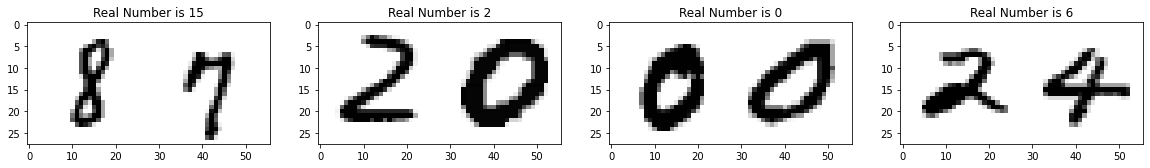

In [76]:
# checking the pixel result of train data
X_ = X_train.reshape(X_train.shape[0], 28, 56)

fig, ax = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(ax.flat):
    ax.imshow(X_[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");


In [77]:
# Standardize the dataset
def standardize(x):
    return (x- np.mean(X_train))/np.std(X_train)

In [88]:

from keras.layers.normalization.batch_normalization import BatchNormalization
model=Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))   

model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,56,1))) #creates a convolution kernel 
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2))) #Downsamples the input along its spatial dimensions
model.add(BatchNormalization()) # Normalizing the processed data

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(19,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [89]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.01, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


#datagen.fit(X_train)
train_gen = datagen.flow(X_train, y_train, batch_size=128)
test_gen = datagen.flow(X_test, y_test, batch_size=128)

In [105]:
epochs = 50
bs = 128
train_steps = X_train.shape[0] // bs
valid_steps = X_test.shape[0] // bs

es = keras.callbacks.EarlyStopping(
        monitor="val_acc", # metrics to monitor
        patience=10, # how many epochs before stop
        verbose=1,
        mode="max", # we need the maximum accuracy.
        restore_best_weights=True, # 
     )

rp = keras.callbacks.ReduceLROnPlateau(
        monitor="val_acc",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

In [92]:
history = model.fit_generator(train_gen, 
                              epochs = epochs, 
                              steps_per_epoch = train_steps,
                              validation_data = test_gen,
                              validation_steps = valid_steps, 
                              callbacks=[es, rp])

Epoch 1/50
351/351 [==============================] - 16s 46ms/step - loss: 1.4007 - accuracy: 0.5377 - val_loss: 3.1775 - val_accuracy: 0.1542
Epoch 2/50
351/351 [==============================] - 17s 47ms/step - loss: 0.2419 - accuracy: 0.9291 - val_loss: 0.2848 - val_accuracy: 0.9103
Epoch 3/50
351/351 [==============================] - 17s 49ms/step - loss: 0.1574 - accuracy: 0.9545 - val_loss: 0.2234 - val_accuracy: 0.9367
Epoch 4/50
351/351 [==============================] - 16s 45ms/step - loss: 0.1235 - accuracy: 0.9631 - val_loss: 0.1314 - val_accuracy: 0.9609
Epoch 5/50
351/351 [==============================] - 16s 46ms/step - loss: 0.1043 - accuracy: 0.9697 - val_loss: 0.1476 - val_accuracy: 0.9611
Epoch 6/50
351/351 [==============================] - 15s 44ms/step - loss: 0.0919 - accuracy: 0.9724 - val_loss: 0.1380 - val_accuracy: 0.9637
Epoch 7/50
351/351 [==============================] - 16s 46ms/step - loss: 0.0873 - accuracy: 0.9741 - val_loss: 0.1207 - val_accuracy:

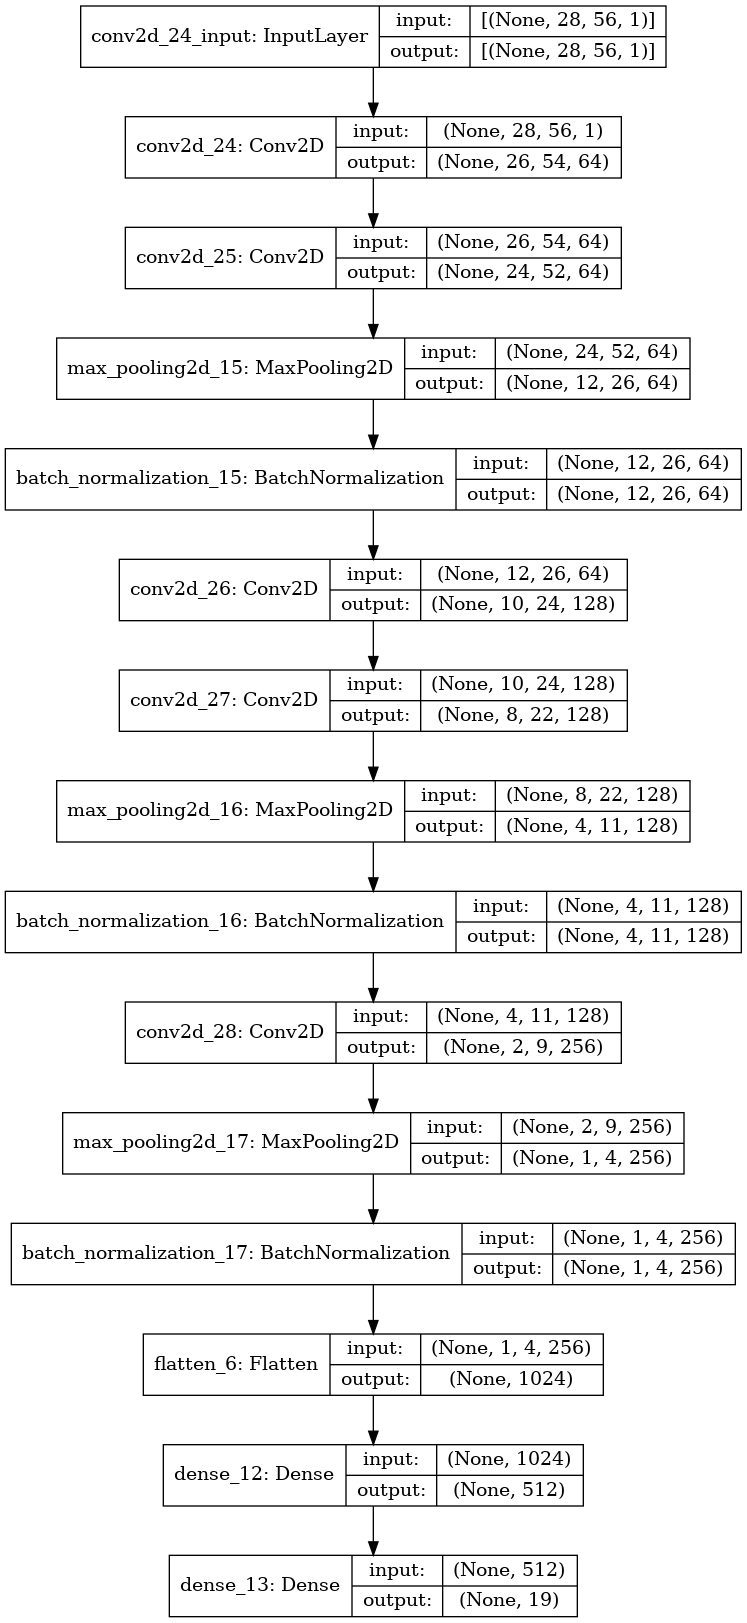

In [98]:
# Gives the Layers of CNN
from keras.utils.vis_utils import plot_model  
plot_model(model, to_file='CNN_model_arch.png', show_shapes=True, show_layer_names=True)

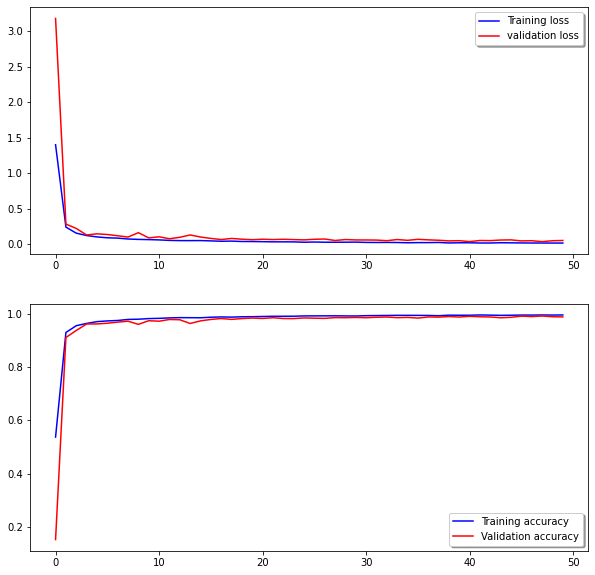

In [99]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(10, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

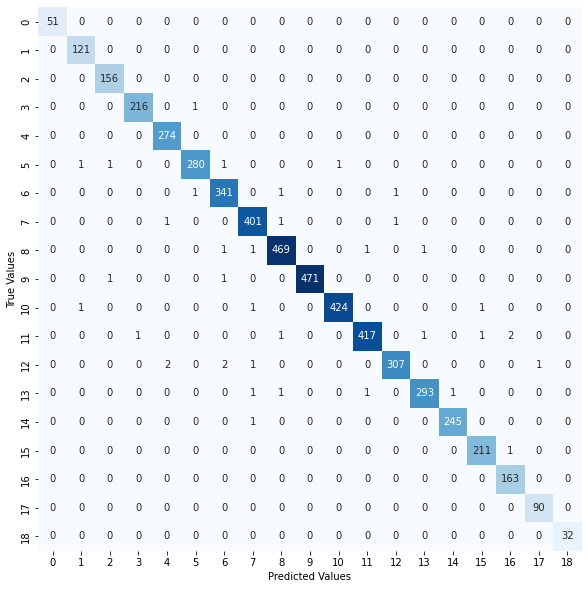

In [95]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(X_test) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

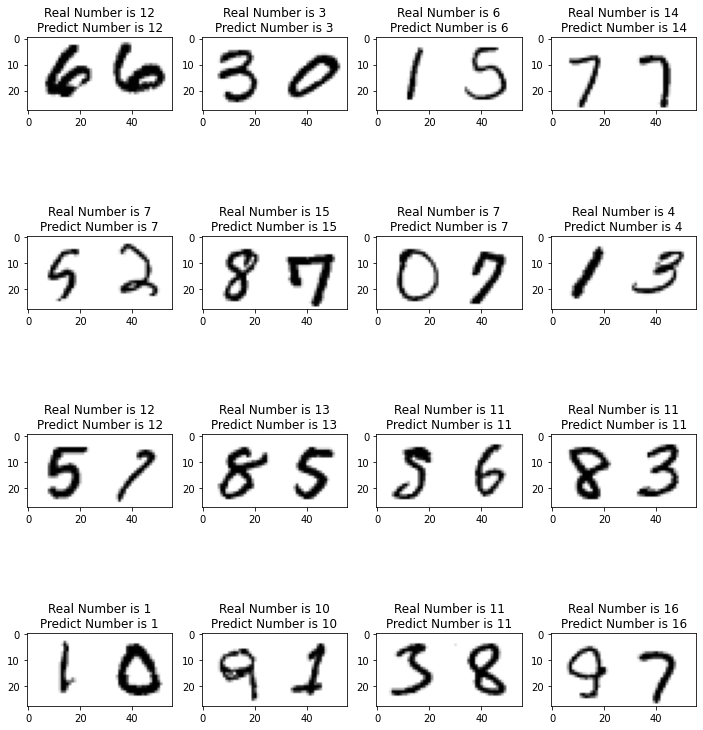

In [100]:
pred = model.predict(X_test)
X_t = X_test.reshape(X_test.shape[0], 28, 56)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_t[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {pred[i].argmax()}");

In [30]:
X_test

array([[[[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 8.41079100e-26],
         [-1.42366430e-25],
         [-3.16300680e-26]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 4.16644280e-26],
         [ 4.33659030e-25],
         [-1.21939310e-25]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [-7.51446300e-24],
         [ 1.39675810e-25],
         [-7.52750100e-26]],

        ...,

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 8.13591500e-23],
         [-1.46529760e-23],
         [ 3.43282100e-23]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 7.29689950e-24],
         [ 8.56725900e-24],
         [ 1.30279866e-23]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [

In [101]:
# preprocess test data
test = pd.read_csv('../input/classification-of-mnist-digits/test.csv')
X_test=test
X_test=X_test.loc[:, ~X_test.columns.str.contains('^Unnamed')]
test_x = X_test.values
test_x = test_x.reshape(-1,28,56,1)
# predict test data
predictions = np.argmax(model.predict(test_x), axis=-1)

In [102]:
predictions

array([14,  7, 10, ..., 10,  4,  6])

In [103]:
test_pred = pd.DataFrame(predictions)
test_pred.index.name = 'Index'
test_pred = test_pred.rename(columns = {0: 'Class'}).reset_index()
test_pred

,Index,Class
0,0,14
1,1,7
2,2,10
3,3,7
4,4,5
...,...,...
9995,9995,7
9996,9996,12
9997,9997,10
9998,9998,4


In [40]:
test_pred.to_csv('test_result.csv', index = False)